# UAS RISET

Nama Anggota :

- Kennedy Suganto (01082220002)
- Liora Carlita (01082220001)
- Callysa Tanjaya (01082220018)

# Canadian House Price Prediction

RUBRIK: **'Menjelaskan masalah yang dihadapi dengan jelas, dilengkapi dengan satu sitasi pada artikel ilmiah, serta menjelaskan solusi yang ditawarkan dan bagaimana solusi dapat membantu menjawab pertanyaan.**

Projek ini ditulis sebagai media untuk mempraktekkan metode-metode data science yang telah dipelajari di kelas Pengantar Data Science.

Melalui projek ini, objektif kami adalah membuat model yang dapat memprediksi harga rumah di Kanada sesuai input berupa jumlah kamar dan kamar mandi menggunakan algoritma regresi linear. Harapannya, model yang kami buat dapat membantu orang-orang yang ingin memperkirakan harga yang perlu mereka keluarkan untuk membeli rumah impian mereka di Kanada.

https://www.jetir.org/papers/JETIR2110302.pdf

# Data Collection and Understanding

In [ ]:
import pandas as pd
import numpy as np
import math

Tahap awal setelah mengenali permasalahan yang ada dan tujuan yang akan dilakukan adalah memasukkan data ke dalam jupyter notebook, yang di mana data yang digunakan diambil dari
https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities/ dengan sedikit penyesuaian untuk kepentingan pembelajaran dalam projek ini.

Data yang digunakan berjudul "Canadian House Prices for Top Cities" yang membahas mengenai data-data harga rumah yang dijual di kota-kota di Canada. Data tersebut berbentuk tabel yang terdiri dari total 10 fitur dengan 35787 baris data.

Kolom pertama bernama "City" yang berisikan informasi mengenai data rumah yang sedang dijual di kota tersebut.  Kolom berikutnya "Price" menjelaskan harga dari rumah yang sedang dijual. Kolom ketiga yaitu "Addr" berisikan tentang alamat rumah yang sedang dijual. Kolom selanjutnya "Num_Beds" menampilkan informasi mengenai berapa kamar/ruangan yang tersedia di rumah tersebut. Kolom berikutnya "Num_Baths" menampilkan menampilkan informasi mengenai berapa kamar mandi yang tersedia di rumah tersebut. Kemudian kolom keenam "Province" menampilkan informasi mengenai rumah itu terletak diprovinsi mana. Kolom ketujuh menunjukkan "Populton" menunjukan seberapa banyak populasi manusia yang hidup di kota tersebut. Kolom selanjutnya "Latitude" dan "Longitude" menampilkan koordinat dari lokasi rumah tersebut. Kolom yang terakhir "Med_Fam_Income" menampilkan nilai tengah dari penghasilan setiap keluarga dimasing-masing kota.

Dibawah ini adalah contoh datanya.


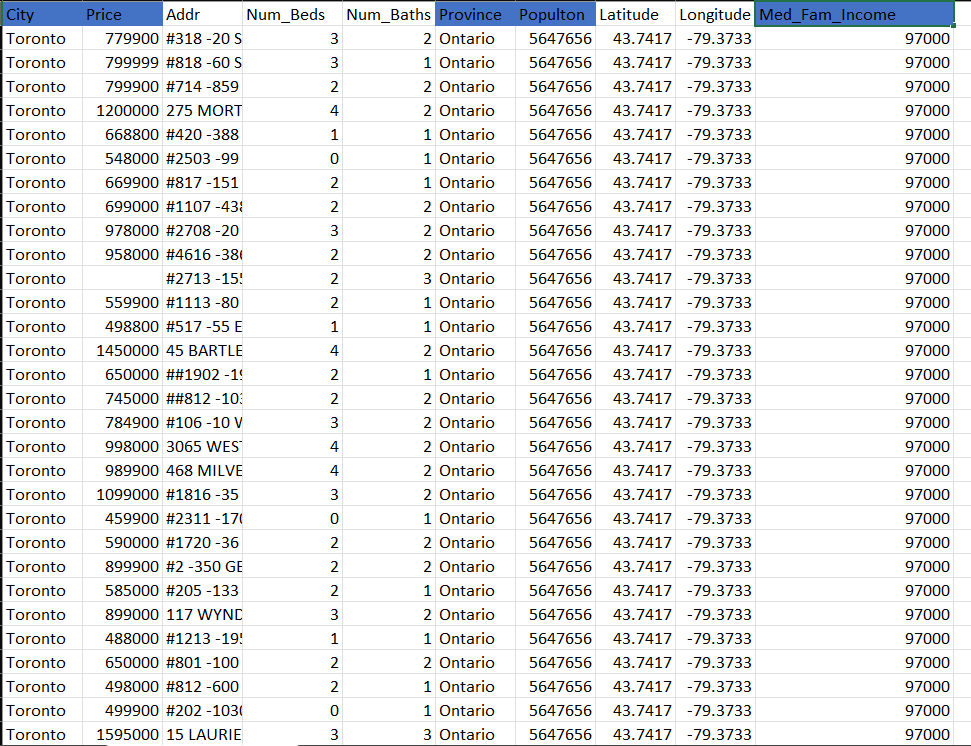

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HouseListing_KaggleBaru1.csv to HouseListing_KaggleBaru1.csv


In [ ]:
data = pd.read_csv('HouseListing_KaggleBaru1.csv', encoding='ISO-8859-1')

data.head(35768)

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


# Data Cleansing

Pertama-tama, penamaan kolom/fitur tabel agak kurang enak dilihat, seperti Addr (kurang lengkap), Populton (typo), Med_Fam_Income (kurang jelas).Oleh karena itu, mari kita perbaiki penamaan kolom-kolom tersebut agar lebih enak dibaca.

In [ ]:
data.rename(columns = {'Addr':'Address','Populton':'Population','Med_Fam_Income':'Median_Family_Income'}, inplace = True)

Kemudian kita hapus kolom yang tidak kita perlukan, yaitu latitude dan longitude. Kedua kolom tersebut dapat kita hapus karena rasanya tidak terlalu berpengaruh kepada perhitungan prediksi harga rumah yang ingin kita lakukan.

In [ ]:
data.drop(columns =['Latitude', 'Longitude'],inplace = True)

In [ ]:
data.columns

Index(['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Median_Family_Income'],
      dtype='object')

Setelah memperbaiki penamaan fitur dan menghapus fitur yang tidak relevan, kita lanjutkan ke langkah selanjutnya yaitu mengecek outlier dan menyingkirkan nilai-nilai outlier tersebut.

In [ ]:
# Check outlier by calculating the upper and lower limits
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print("Q1 =", Q1)
print("Q3 =", Q3)
print("IQR =",IQR)
print("Upper bound =", upper)
print("Lower bound=",lower)

Q1 = 447500.0
Q3 = 950000.0
IQR = 502500.0
Upper bound = 1703750.0
Lower bound= -306250.0


Karena batas bawahnya negatif, jadi seharusnya tidak ada outlier yang di bawah, jadi kita drop yang di atas saja.

In [ ]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['Price'] >= upper)[0]

# Removing the outliers
data.drop(index=upper_array, inplace = True)

Setelah melakukan trimming pada nilai-nilai outlier, kita akan mengecek apakah terdapat missing values dalam keseluruhan data kita.

In [ ]:
data.isnull().sum()

City                    0
Price                   6
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Median_Family_Income    0
dtype: int64

Ternyata ada beberapa data yang hilang di kolom Price, jadi mari kita cari dan isi data yang hilang tersebut.

In [ ]:
# Menunjukkan baris mana yang datanya hilang
null_rows= data[data.isna().any(axis=1)]
print(null_rows)

              City  Price                   Address  Number_Beds  \
10         Toronto    NaN  #2713 -155 YORKVILLE AVE            2   
613        Toronto    NaN         36 MACPHERSON AVE            5   
1275       Toronto    NaN        #421 -628 FLEET ST            2   
1512     Vancouver    NaN         266 W 26TH AVENUE            4   
22963  Thunder Bay    NaN          173 Prospect AVE            3   
31357      Caledon    NaN         16881 THE GORE RD            5   

       Number_Baths          Province  Population  Median_Family_Income  
10                3           Ontario     5647656               97000.0  
613               4           Ontario     5647656               97000.0  
1275              1           Ontario     5647656               97000.0  
1512              2  British Columbia     2426160               90000.0  
22963             2           Ontario      108843               80000.0  
31357             4           Ontario       76581              133000.0  


Dari tabel di atas kita bisa melihat baris data mana saja yang hilang dan harus kita perbaiki. Nah, di bawah ini kita akan mengisi data yang hilang dengan nilai mean.

In [ ]:
data.fillna(value=data.mean(numeric_only=True), inplace= True)

# Data Visualization

  Setelah itu kita describe data kita, agar kita dapat mengetahui statistik dasar seperti mean, standar deviasi, persentil, dll.

In [ ]:
data.describe()

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Selanjutnya kita akan melihat berapa jumlah setiap kota yang ada dalam dataset kita.

In [ ]:
data['City'].value_counts()

Regina              1917
Saskatoon           1787
Edmonton            1343
London              1323
Calgary             1298
Hamilton            1227
St. Catharines      1224
Victoria            1193
Kelowna             1191
New Westminster     1190
Caledon             1166
Burnaby             1137
Kitchener           1136
Toronto             1120
Maple Ridge         1085
Ottawa              1059
Oshawa              1049
Vancouver            967
Barrie               964
White Rock           755
Windsor              713
Abbotsford           670
St. John's           654
Nanaimo              653
Brantford            597
Winnipeg             525
Kingston             476
Saint John           452
Kamloops             438
Moncton              416
Guelph               401
Lethbridge           377
Red Deer             323
Prince George        305
Peterborough         300
Medicine Hat         277
Airdrie              219
Montreal             208
Sudbury              201
Sherbrooke           196


Setelah kita mengetahui berapa jumlah untuk masing-masing kota, kita akan melakukan visualisasi untuk memahami situasi ini lebih mudah.

<ipython-input-100-ec1ca3536064>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha = "right", fontsize = 20)


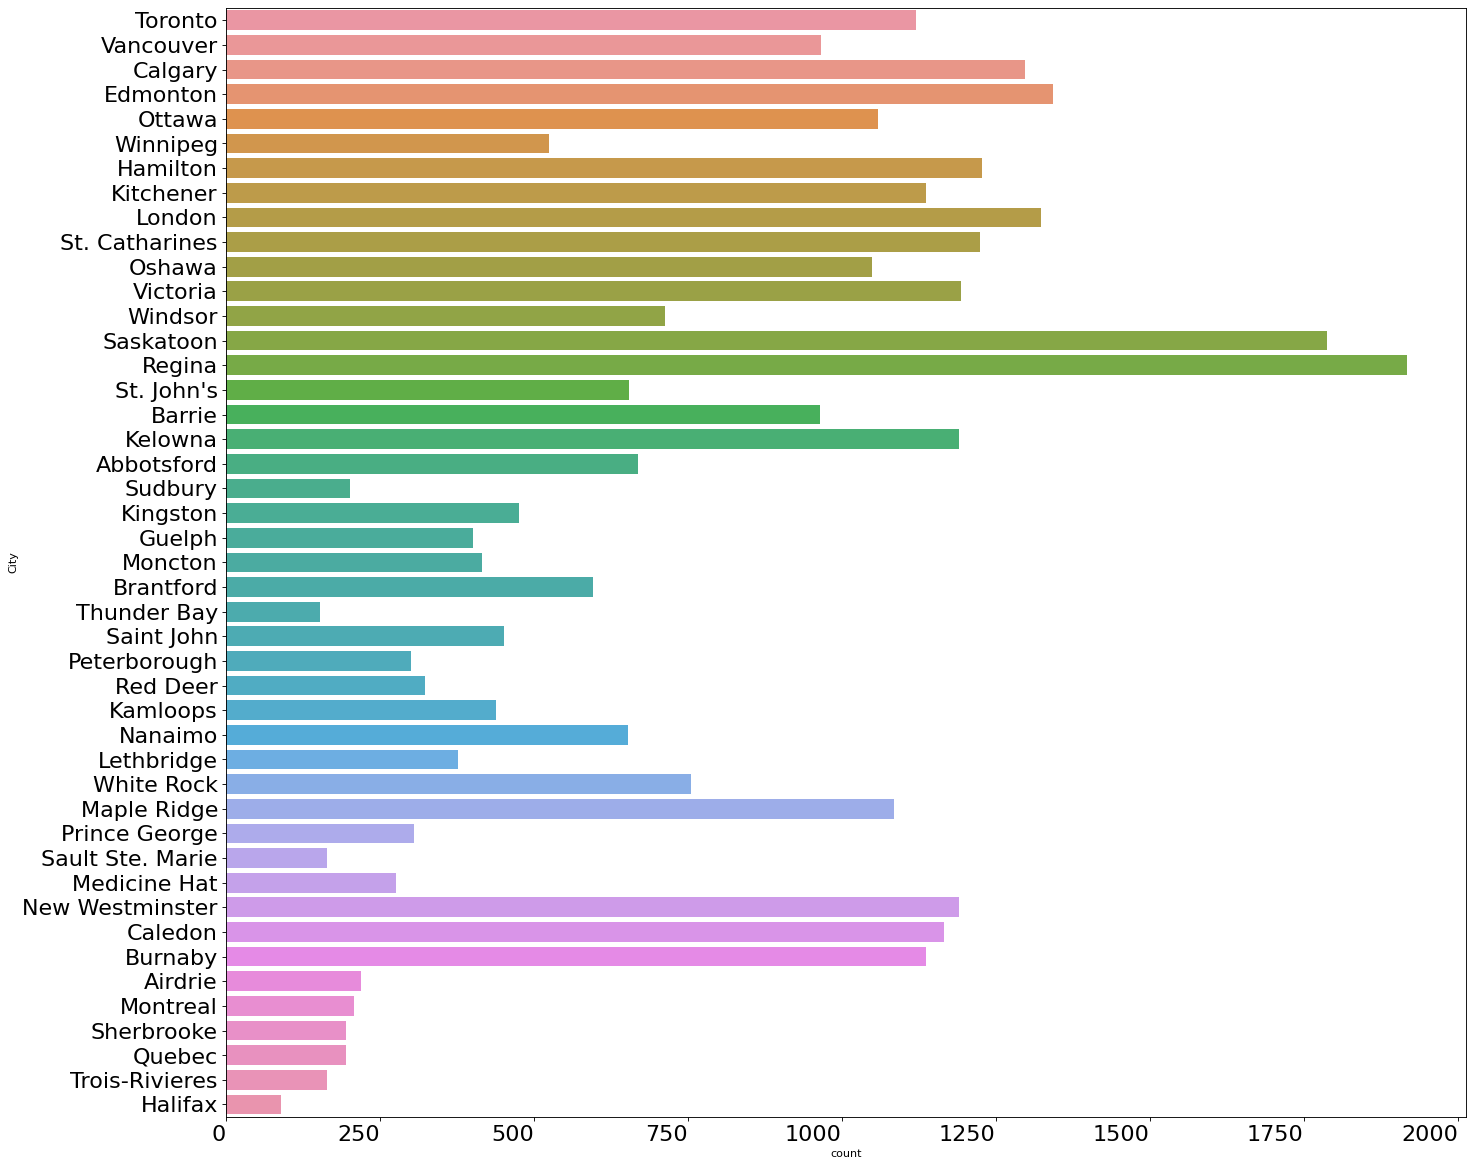

In [ ]:
plt.figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')

ax = sns.countplot(y = 'City', data = data)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha = "right", fontsize = 20)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, ha = "right", fontsize = 20)

plt.show()

In [ ]:
data['Province'].value_counts()

Ontario                      13286
British Columbia              9580
Alberta                       3837
Saskatchewan                  3694
New Brunswick                  868
Quebec                         765
Newfoundland and Labrador      657
Manitoba                       524
Nova Scotia                     89
Name: Province, dtype: int64

# Modelling

Kita akan menggunakan Regression untuk memodelkan data kita dan regression error untuk melihat sejauh mana harga prediksi berdekatan dengan nilai aktualnya.

In [ ]:
data.drop(columns =['City', 'Address','Province'],inplace = True)

In [ ]:
print(data.shape)
data.columns

(33300, 5)


Index(['Price', 'Number_Beds', 'Number_Baths', 'Population',
       'Median_Family_Income'],
      dtype='object')

Memilih variabel Independent (Features) & Dependent(Target)

In [ ]:
X = data.drop(columns=['Price'])
y = data['Price']

In [ ]:
print(X.shape)
X.sample(5)

(33300, 4)


,Number_Beds,Number_Baths,Population,Median_Family_Income
27566,3,2,90990,105000.0
8714,6,4,522888,92000.0
4608,4,2,1151635,96000.0
9081,2,1,522888,92000.0
31662,2,2,249125,83000.0


In [ ]:
print(y.shape)
y.tail(5)

(33300,)


35762    580000.0
35763    439900.0
35765    419900.0
35766    949900.0
35767    592900.0
Name: Price, dtype: float64

Bagi datanya menjadi Trainning set dan Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26640, 4)
(6660, 4)
(26640,)
(6660,)


#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

from math import sqrt

# creating the model
lrmodel = LinearRegression()

# feeding the training data to the model
lrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = lrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  130411426493.46469
RMSE:  361125.2227323158
R2 : 0.2679089813227883


#### Support Vector Machine

In [ ]:
from sklearn.svm import SVR

# creating the model
svrmodel = SVR()

# feeding the training data to the model
svrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = svrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  183390571532.78003
RMSE:  428241.2538894169
R2 : -0.02950020515232299


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
dtrmodel = DecisionTreeRegressor()

# feeding the training data to the model
dtrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = dtrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  64705139266.87983
RMSE:  254372.04891040962
R2 : 0.6367645643235506


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
#rfrmodel = RandomForestRegressor()
rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = rfrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  117944376311.46066
RMSE:  343430.3077939696
R2 : 0.3378952985731455
